# Getting the data
#### **Summary:** *This code segment is designed to import the document file(s) that contain the clinical trial data. This code demonstrates how to load and process data from an Excel file using the Pandas library in Python. Specifically, it focuses on loading an Excel file containing multiple sheets, retrieving the names of the sheets, and extracting specific sheets into separate DataFrames.*

#### **Data Loading:** 
The code uses the `read_excel` function from the Pandas library to load an Excel file (`synthetic_participant_dose_data.xlsx`) into a dictionary of DataFrames. By specifying `sheet_name=None`, all sheets in the Excel file are loaded into the dictionary.  
  
#### **Sheet Names Retrieval:**  
After loading the Excel file, the code retrieves the names of all potential sheets by joining the keys of the DataFrame dictionary into a single string. In case the names of the sheets is not known, this will help discover which sheets contain which information.
  
#### **Specific Sheets Extraction:**
Using the `sheet_name` argument of the `read_excel` function, the code extracts specific sheets, such as "participants" and "doses", into separate DataFrames.  
  
#### **Missing Values Check (Optional)**  
The code includes a commented-out line (`print(doses.isna().any())`) that can be used to check for missing values in one of the loaded DataFrames.  If uncommented, it would display a Boolean series indicating whether each column in the "doses" DataFrame contains missing values. This can be changed to check any sheet for missing values, should they be relevant. If any missing values are found, further steps might be taken to handle or remove them as necessary.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###LOAD IN THE SHEET
dataframe = pd.read_excel('../data/synthetic_participant_dose_data.xlsx',sheet_name=None)

###GET THE NAMES OF ALL OF THE POTENTIAL SHEETS
sheet_names = ", ".join(dataframe.keys())
print(f"Sheet names = {sheet_names}")

###Get the sheets you want
participants = pd.read_excel('../data/synthetic_participant_dose_data.xlsx',sheet_name='participants')
doses = pd.read_excel('../data/synthetic_participant_dose_data.xlsx',sheet_name='doses')

###check for missing values and remove those
#print(doses.isna().any())

Sheet names = participants, doses, data dictionary


# Filtering for clinical trial participation and adverse events 

#### **Summary:** *This analysis offers insights into the prevalence of adverse events among participants who completed the clinical trial. The visualization helps understand the proportion of participants affected by adverse events relative to the total number of participants in the trial.*

#### **Participant Filtering:** 
Participants who met the inclusion criteria, were not excluded, were accepted, started, and finished the trial are filtered from the `participants` DataFrame. This ensures that only participants who completed the trial under suitable conditions are considered.
#### **Merging Dataframes:** 
The relevant information about these full participants is merged with dose information based on the ParticipantID, resulting in the `full_participant_info` DataFrame.
#### **Converting Administration Date:** 
The `AdministrationDate` column is converted to datetime format to facilitate further analysis. The data is sorted by `ParticipantID` and `AdministrationDate`.
#### **Counting Adverse Events:** 
The code counts the number of unique patients who experienced adverse events (`SeverityOfAdverseEvents` is not null) among the full participants. It also calculates the total number of unique patients in the trial.
#### **Visualization:** 
A pie chart is generated to visually represent the proportion of patients who experienced adverse events compared to those who did not. The chart is labeled with percentages to provide clear insights into the distribution of adverse events among participants.

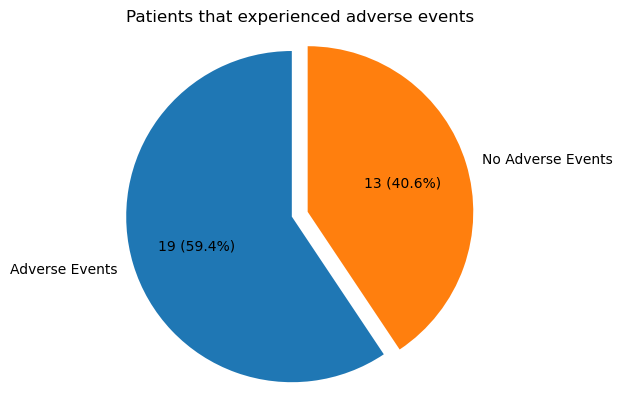

In [3]:
###get everyone who completed the trial
included_participants = participants["InclusionCriteriaMet"] == 1 ##included
not_excluded_participants = participants["ExclusionCriteriaMet"] == 0  ##not excluded
accepted_participants = participants["Accepted"] == 1
started_participants = participants["Started"] == 1
finished_participants = participants["Finished"] == 1
full_participants = participants[included_participants & not_excluded_participants & accepted_participants & started_participants & finished_participants]

full_participant_info = pd.merge(full_participants, doses, on = "ParticipantID", how = "inner")

##convert Administration date to datetime
full_participant_info = full_participant_info.sort_values(by = ['ParticipantID', 'AdministrationDate'])
full_participant_info["updated_dose_number"] = full_participant_info.groupby('ParticipantID').cumcount() + 1

##count unique patients with adverse events
patients_w_adverse = full_participant_info.loc[~full_participant_info['SeverityOfAdverseEvents'].isna(), 'ParticipantID'].nunique()
total_unique_patients = full_participant_info['ParticipantID'].nunique()
percentage_patients_with_adverse_events = (patients_w_adverse/total_unique_patients) * 100
##visualization
labels = ['Adverse Events', 'No Adverse Events']
sizes = [patients_w_adverse, total_unique_patients-patients_w_adverse]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p), startangle=90)
plt.title('Patients that experienced adverse events')
plt.axis('equal')
plt.show()
plt.close()